# Exploratory Data Analysis

## Import library and data

In [1]:
library(tidyverse)

Warning message:
"package 'stringr' was built under R version 4.3.1"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv('ouput_process.csv')

## Data Understanding

In [3]:
dim(df)

[1] 414  10

In [4]:
head(df)

,Date,Chance.of.precipitation,Temperature,Feels.like.temperature..C,Wind.gust.mph,Visibility,Humidity.,UV..,Wind.direction,Speed
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,2023-06-15 18:00:00,60,30,33,13,VG,73,1,WSW,7
2,2023-06-15 19:00:00,60,29,32,11,VG,80,0,WSW,6
3,2023-06-15 20:00:00,60,28,31,10,VG,82,0,WSW,6
4,2023-06-15 21:00:00,10,28,31,9,VG,84,0,WSW,5
5,2023-06-15 22:00:00,10,28,31,8,VG,86,0,SW,4
6,2023-06-15 23:00:00,10,27,31,8,VG,88,0,SW,4


In [5]:
colnames(df)

[1] "Date"                      "Chance.of.precipitation"  
 [3] "Temperature"               "Feels.like.temperature..C"
 [5] "Wind.gust.mph"             "Visibility"               
 [7] "Humidity."                 "UV.."                     
 [9] "Wind.direction"            "Speed"

In [6]:
df %>% summarize_all(class) %>% gather(var,class)

var,class
<chr>,<chr>
Date,character
Chance.of.precipitation,integer
Temperature,integer
Feels.like.temperature..C,integer
Wind.gust.mph,integer
Visibility,character
Humidity.,integer
UV..,integer
Wind.direction,character


In [7]:
summary(df) 

     Date           Chance.of.precipitation  Temperature   
 Length:414         Min.   : 5.0            Min.   :26.00  
 Class :character   1st Qu.:10.0            1st Qu.:27.00  
 Mode  :character   Median :20.0            Median :28.00  
                    Mean   :28.6            Mean   :28.32  
                    3rd Qu.:40.0            3rd Qu.:30.00  
                    Max.   :70.0            Max.   :32.00  
 Feels.like.temperature..C Wind.gust.mph    Visibility          Humidity.    
 Min.   :29.00             Min.   : 4.00   Length:414         Min.   :58.00  
 1st Qu.:31.00             1st Qu.: 8.00   Class :character   1st Qu.:74.00  
 Median :31.00             Median :10.00   Mode  :character   Median :84.00  
 Mean   :31.57             Mean   :11.04                      Mean   :81.61  
 3rd Qu.:32.75             3rd Qu.:14.00                      3rd Qu.:90.00  
 Max.   :35.00             Max.   :26.00                      Max.   :95.00  
      UV..        Wind.direction  

## Feature Understanding

### Check Name Column

In [8]:
df <-df %>% mutate(Date=as.POSIXct(Date ,format = "%Y-%m-%d %H:%M:%S"))

In [9]:
class(df$Date)

[1] "POSIXct" "POSIXt"

In [10]:
colnames(df) <- toupper(colnames(df))

In [11]:
colnames(df)

[1] "DATE"                      "CHANCE.OF.PRECIPITATION"  
 [3] "TEMPERATURE"               "FEELS.LIKE.TEMPERATURE..C"
 [5] "WIND.GUST.MPH"             "VISIBILITY"               
 [7] "HUMIDITY."                 "UV.."                     
 [9] "WIND.DIRECTION"            "SPEED"

In [12]:
df <- rename(df, CHANCE_OF_PRECIPITATION = CHANCE.OF.PRECIPITATION, 
           FEELS_LIKE_TEMPERATURE = FEELS.LIKE.TEMPERATURE..C ,
           WIND_GUST = WIND.GUST.MPH ,
           HUMIDITY = HUMIDITY.,      
           UV = UV.. ,
           WIND_DIRECTION = WIND.DIRECTION   
      )

## Feature Understanding

In [13]:
head(df)

,DATE,CHANCE_OF_PRECIPITATION,TEMPERATURE,FEELS_LIKE_TEMPERATURE,WIND_GUST,VISIBILITY,HUMIDITY,UV,WIND_DIRECTION,SPEED
,<dttm>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,2023-06-15 18:00:00,60,30,33,13,VG,73,1,WSW,7
2,2023-06-15 19:00:00,60,29,32,11,VG,80,0,WSW,6
3,2023-06-15 20:00:00,60,28,31,10,VG,82,0,WSW,6
4,2023-06-15 21:00:00,10,28,31,9,VG,84,0,WSW,5
5,2023-06-15 22:00:00,10,28,31,8,VG,86,0,SW,4
6,2023-06-15 23:00:00,10,27,31,8,VG,88,0,SW,4


##### Target Variable: `CHANCE_OF_PRECIPITATION`

In [14]:
summary(df$CHANCE_OF_PRECIPITATION)
class(df$CHANCE_OF_PRECIPITATION)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    10.0    20.0    28.6    40.0    70.0 

[1] "integer"

In [15]:
table(df$CHANCE_OF_PRECIPITATION)


  5  10  20  30  40  50  60  70 
 30 170   9  38  70  17  58  22 

- Giá trị thay đổi trong khoảng từ 5-70

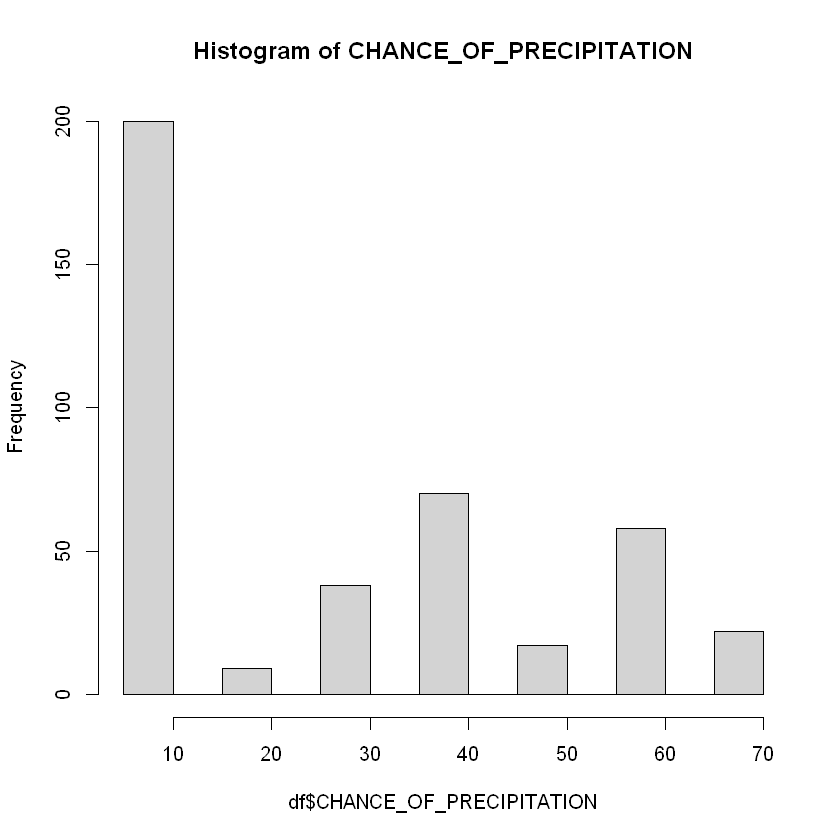

In [16]:
hist(df$CHANCE_OF_PRECIPITATION, main = "Histogram of CHANCE_OF_PRECIPITATION")

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


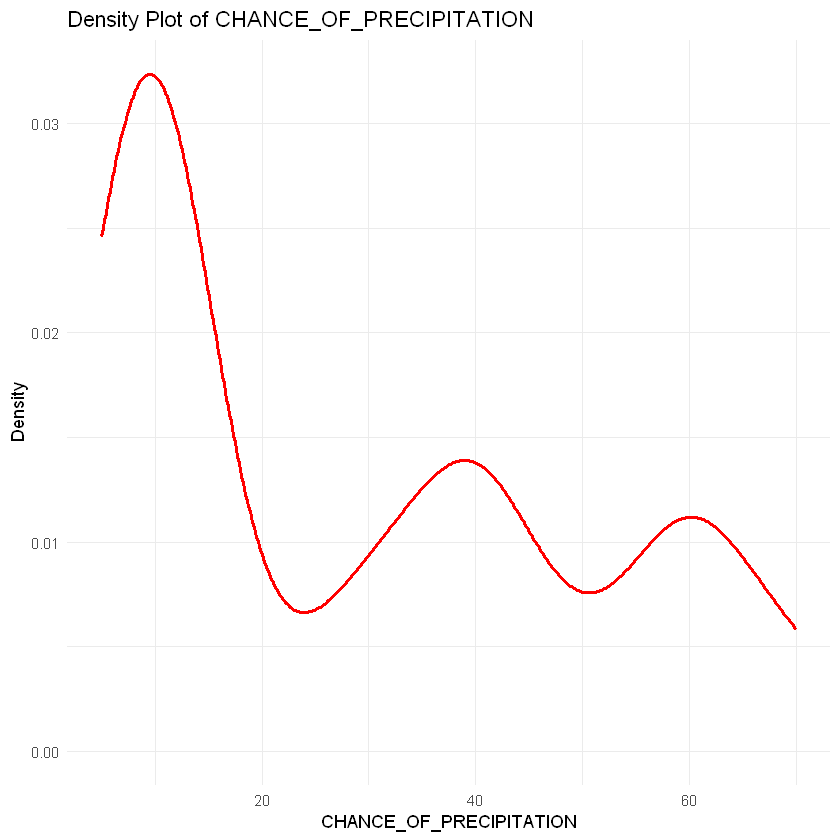

In [17]:
ggplot(df, aes(x = CHANCE_OF_PRECIPITATION)) +
  geom_density(color = "red", size = 1) +
  labs(title = "Density Plot of CHANCE_OF_PRECIPITATION", x = "CHANCE_OF_PRECIPITATION", y = "Density") +
  theme_minimal()

The data is concentrated at 5-10%, which means the weather is mostly no rain
- The reason is that the data is collected around June-July, which is the transition period between the rainy and sunny seasons in HCMC, so most of the time it will be sunny and there are some places with rain.

### Character variable

`VISIBILITY`

In [18]:
table(df$VISIBILITY)


  G  VG 
118 296 

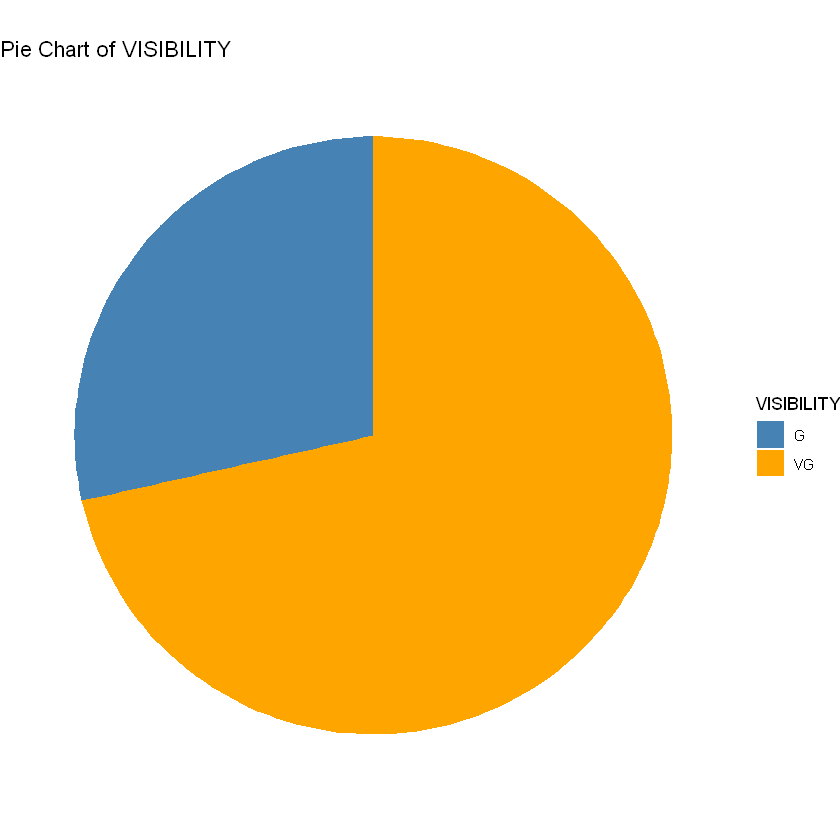

In [19]:
ggplot(df, aes(x = "", fill = VISIBILITY)) +
  geom_bar(width = 1) +
  coord_polar("y") +
  labs(title = "Pie Chart of VISIBILITY", fill = "VISIBILITY") +
  scale_fill_manual(values = c("steelblue", "orange")) +
  theme_void()

- Visibility is very good, because most of the weather does not rain, so it has little effect on visibility

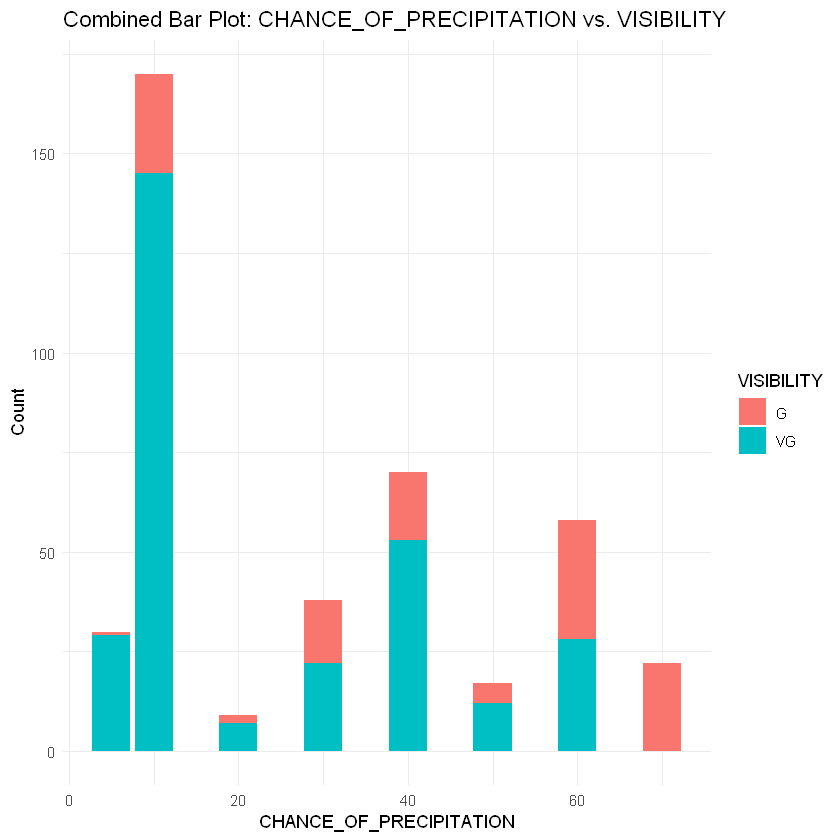

In [20]:
ggplot(df, aes(x = CHANCE_OF_PRECIPITATION, fill = VISIBILITY)) +
  geom_bar() +
  labs(title = "Combined Bar Plot: CHANCE_OF_PRECIPITATION vs. VISIBILITY", x = "CHANCE_OF_PRECIPITATION", y = "Count") +
  theme_minimal()

When the percentage of rain is high, about 60-70%, visibility is also limited
-The simple reason is that it's raining, which will limit visibility

From there we can see that the data is also quite correlated with reality

`WIND_DIRECTION`

In [21]:
table(df$WIND_DIRECTION)


ESE NNE NNW  NW   S  SE SSE SSW  SW   W WNW WSW 
  4   1   1   6  29   3  24  91  84  69  12  90 

Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead."


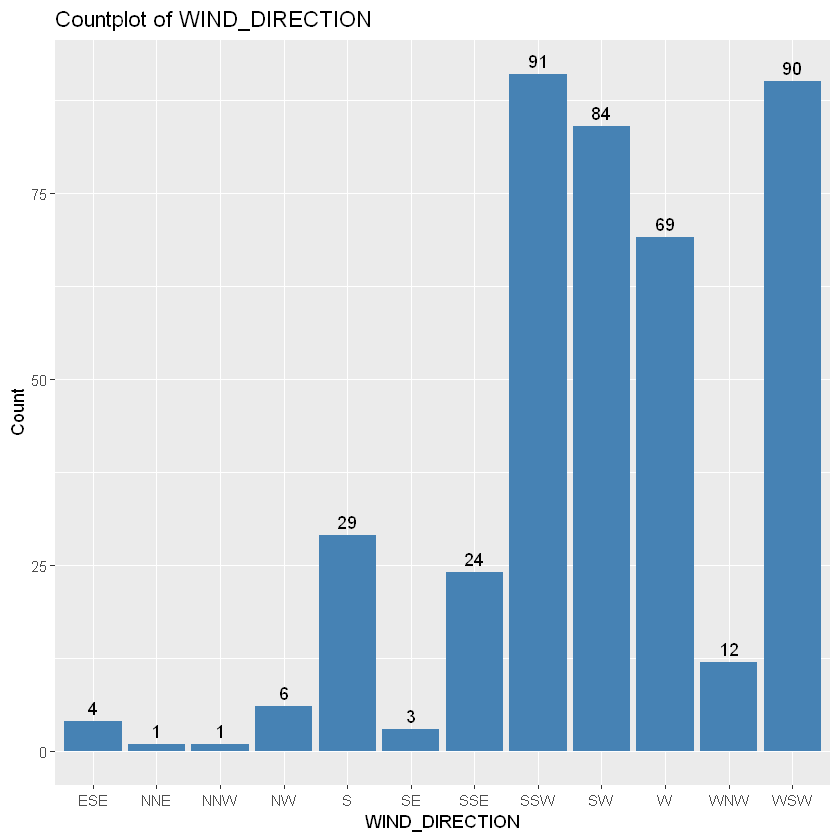

In [22]:
ggplot(df, aes(x = WIND_DIRECTION)) +
  geom_bar(fill = "steelblue") +
  geom_text(stat = "count", aes(label = ..count..), vjust = -0.5) +
  labs(title = "Countplot of WIND_DIRECTION", x = "WIND_DIRECTION", y = "Count")

We have 4 common wind direction groups:
- ssw: South-Southwest  
- sw: Southwest 
- w: West 
- wsw: West-Southwest

Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"


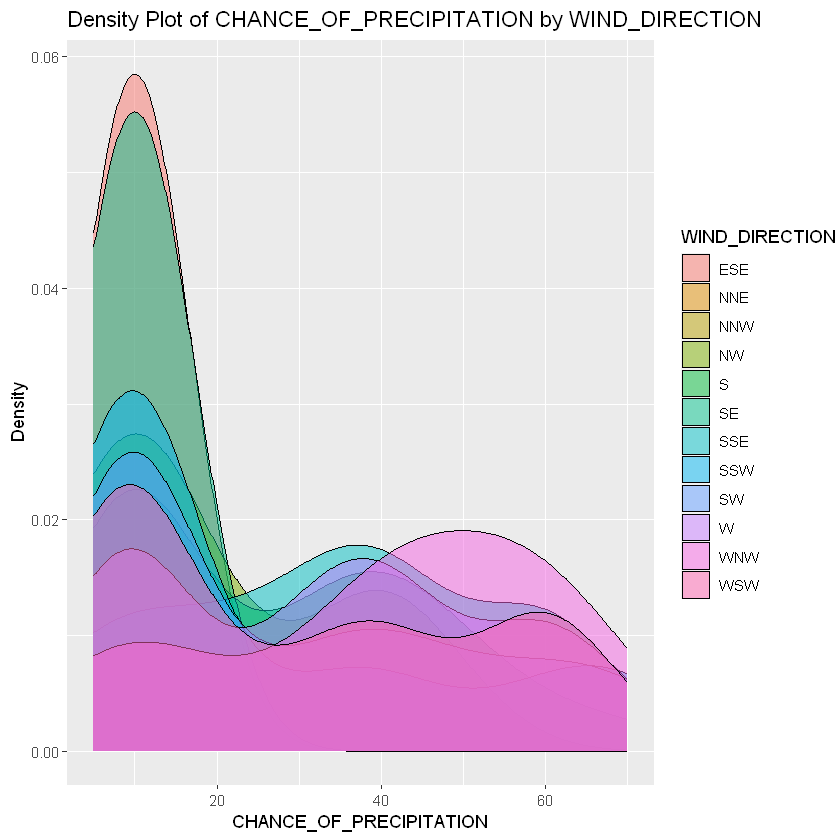

In [23]:
ggplot(df, aes(x = CHANCE_OF_PRECIPITATION, fill = WIND_DIRECTION)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of CHANCE_OF_PRECIPITATION by WIND_DIRECTION", x = "CHANCE_OF_PRECIPITATION", y = "Density") 


At a glance, we can make some comments such as:
- Wind direction has a great influence on the possibility of rain
- Wind direction from S, usually it will rain less
- In contrast, the W gios direction gives better rainfall

### Time Series Feature

In [24]:
count_months <- table(format(df$DATE, "%m"))

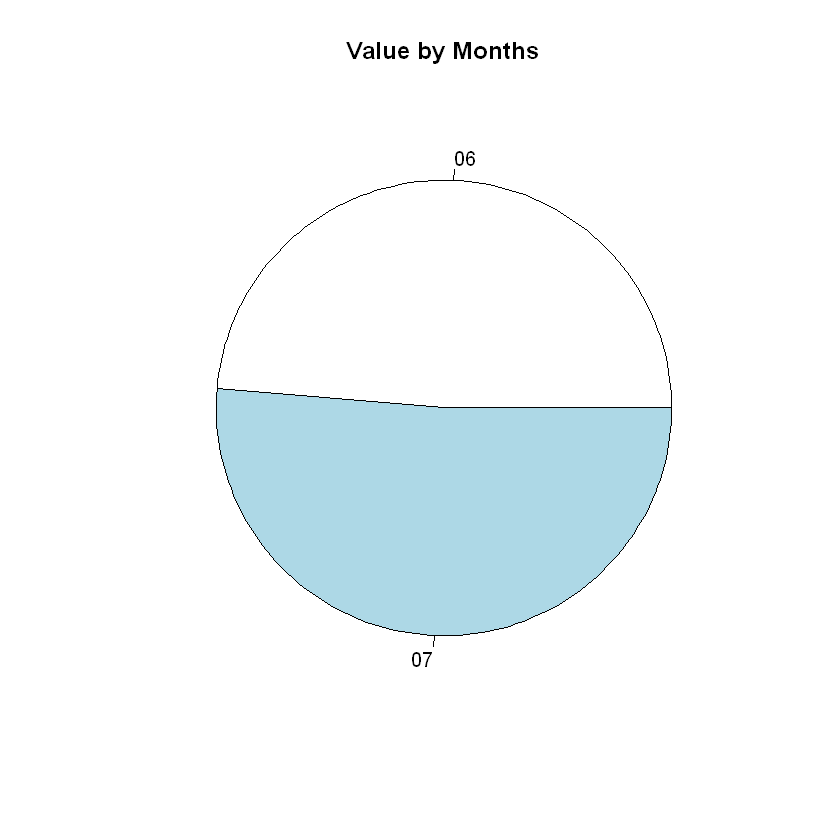

In [25]:
pie(count_months, labels = names(count_months), main = "Value by Months")


In [26]:
colnames(df)

[1] "DATE"                    "CHANCE_OF_PRECIPITATION"
 [3] "TEMPERATURE"             "FEELS_LIKE_TEMPERATURE" 
 [5] "WIND_GUST"               "VISIBILITY"             
 [7] "HUMIDITY"                "UV"                     
 [9] "WIND_DIRECTION"          "SPEED"

In [27]:
head(df)

,DATE,CHANCE_OF_PRECIPITATION,TEMPERATURE,FEELS_LIKE_TEMPERATURE,WIND_GUST,VISIBILITY,HUMIDITY,UV,WIND_DIRECTION,SPEED
,<dttm>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,2023-06-15 18:00:00,60,30,33,13,VG,73,1,WSW,7
2,2023-06-15 19:00:00,60,29,32,11,VG,80,0,WSW,6
3,2023-06-15 20:00:00,60,28,31,10,VG,82,0,WSW,6
4,2023-06-15 21:00:00,10,28,31,9,VG,84,0,WSW,5
5,2023-06-15 22:00:00,10,28,31,8,VG,86,0,SW,4
6,2023-06-15 23:00:00,10,27,31,8,VG,88,0,SW,4


Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


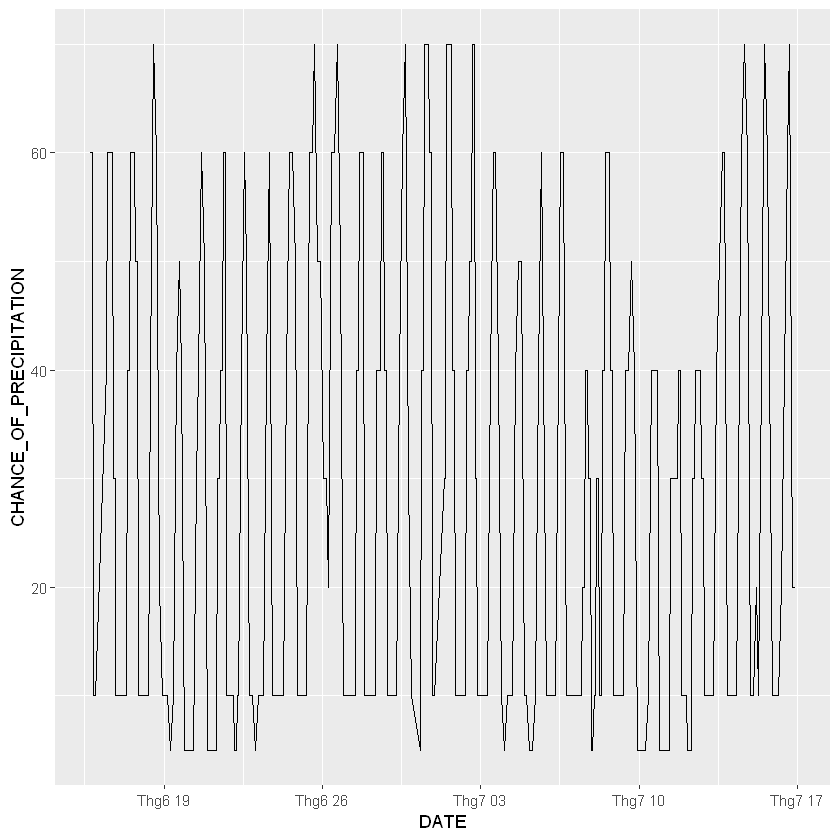

In [51]:
ggplot(df, aes(x=DATE, y=CHANCE_OF_PRECIPITATION)) +
  geom_line()+
# check.overlap avoids label overlapping
scale_x_datetime(guide = guide_axis(check.overlap = TRUE))

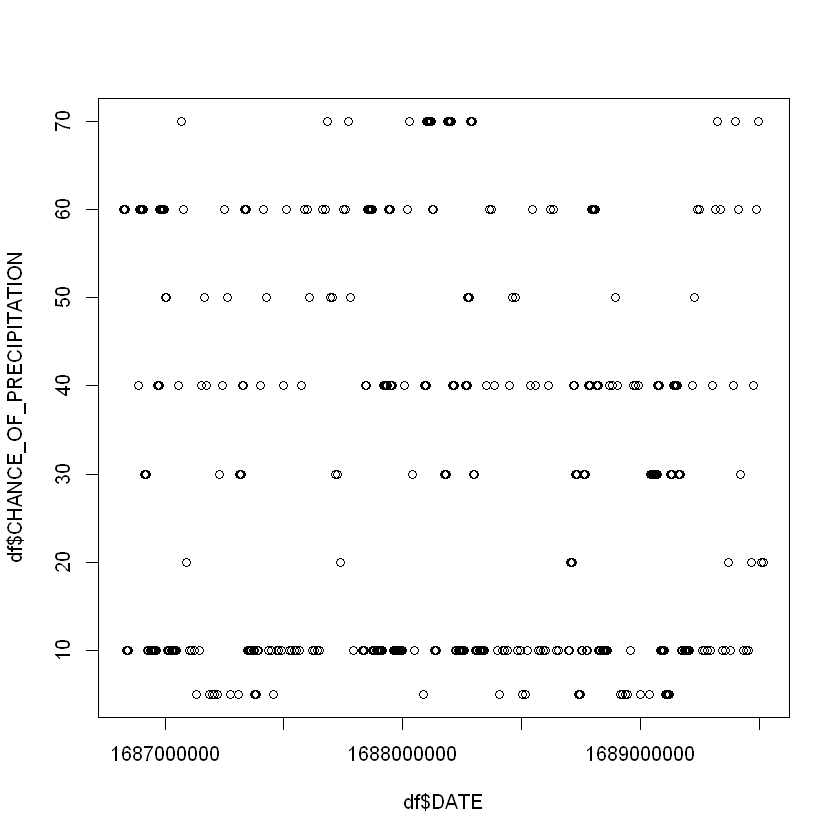

In [44]:
plot.ts(y=df$CHANCE_OF_PRECIPITATION,x=df$DATE )

Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_line()`)."


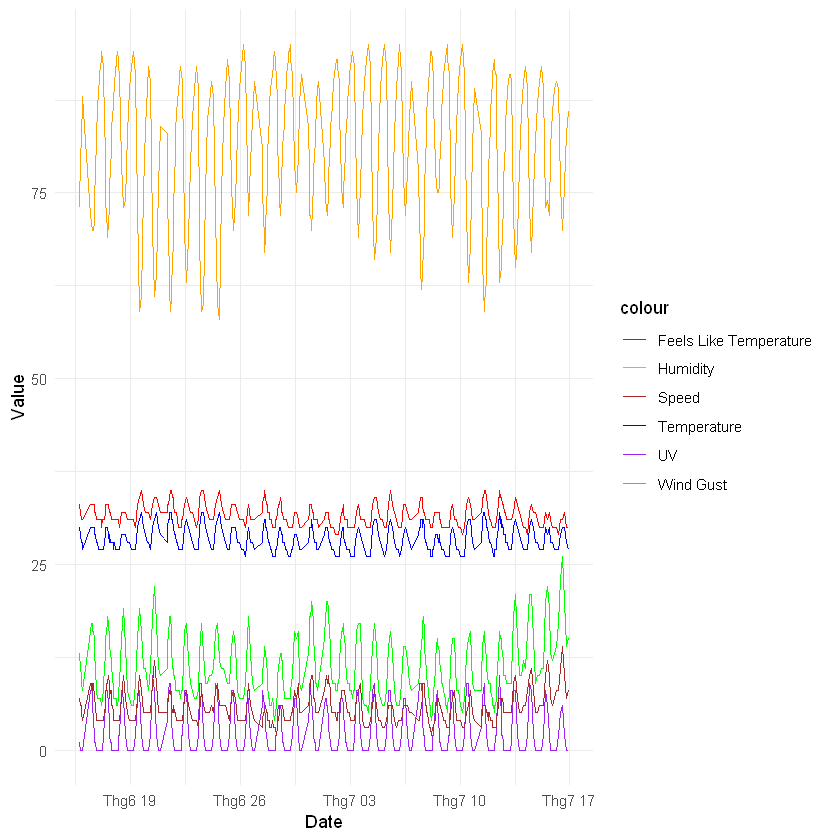

In [52]:
ggplot(df, aes(x = DATE)) +
  geom_line(aes(y = TEMPERATURE, color = "Temperature")) +
  geom_line(aes(y = FEELS_LIKE_TEMPERATURE, color = "Feels Like Temperature")) +
  geom_line(aes(y = WIND_GUST, color = "Wind Gust")) +
  geom_line(aes(y = HUMIDITY, color = "Humidity")) +
  geom_line(aes(y = UV, color = "UV")) +
  geom_line(aes(y = SPEED, color = "Speed")) +
  labs(x = "Date", y = "Value") +
  scale_color_manual(values = c("Temperature" = "blue", "Feels Like Temperature" = "red", 
                                "Wind Gust" = "green", "Humidity" = "orange", 
                                "UV" = "purple", "Speed" = "brown")) +
  theme_minimal()